# Real Estate Price Prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Reading the dataset.

In [2]:
df1 = pd.read_csv("Pune house data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [3]:
df1.shape

(13320, 9)

To check the number of area_type and count of each area_type.

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Removing the columns that do not directly affect the price of the area.

In [5]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df2.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [6]:
df2.isnull().head()

,size,total_sqft,bath,price,site_location
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


To find the total number of null values in the dataframe 2

In [7]:
df2.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

Dropping the null values because h=the total number of rows are significantly large than the total number of null values.

In [8]:
df3=df2.dropna()
df3.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [9]:
df3.shape

(13246, 5)

To check all the unique values of size.

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Removing all the string values and only keeping the number to represent the size.

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-11-cf42672af11e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [12]:
df3.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


Now checking all the values that are converted.

In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

To check the rows with size greater than 20bhk.

In [14]:
df3[df3.bhk>20]

,size,total_sqft,bath,price,site_location,bhk
1718,27 BHK,8000,27.0,230.0,Uruli Devachi,27
4684,43 Bedroom,2400,40.0,660.0,Salunke Vihar,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

To detect if a value in total square feet is float or not.

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

To identify if the rows have non-numeric values or not and display the df3

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,size,total_sqft,bath,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,63.770,Prabhat Road,2
648,9 Bedroom,4125Perch,9.0,265.000,Raviwar Peth,9
661,2 BHK,1120 - 1145,2.0,48.130,Tilak Road,2
672,4 Bedroom,3090 - 5002,4.0,445.000,Alandi Road,4


Create a function to convert the range values into the average value of the lower bound and upper bound, because we don't want value of total_sqft in range.

In [18]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('2166')

2166.0

In [20]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [21]:
convert_sqft_to_num('34.46Sq. Meter')

In [22]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3
3,3 BHK,1521.0,3.0,95.00,Aundh,3
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2
5,2 BHK,1170.0,2.0,38.00,Balaji Nagar,2
6,4 BHK,2732.0,4.0,204.00,Baner,4
7,4 BHK,3300.0,4.0,600.00,Baner road,4
8,3 BHK,1310.0,3.0,63.25,Bhandarkar Road,3
9,6 Bedroom,1020.0,6.0,370.00,Bhavani Peth,6


Removing newly found null values.

In [23]:
df4=df4.dropna()

In [24]:
df4.loc[30]

size                4 BHK
total_sqft         2475.0
bath                  4.0
price               186.0
site_location    Gultekdi
bhk                     4
Name: 30, dtype: object

Day 1 end

Day 2 start

To calculate price per square feet.

In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


To check total unique locations in the data set.

In [26]:
len(df5.site_location.unique())

97

To check the count of data points in each location in ascending order to determine which location has very less data points.

In [27]:
df5.site_location = df5.site_location.apply(lambda x: x.strip())
location_stats = df5.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Kasba Peth         139
Bibvewadi          139
Mangalwar peth     139
Ambegaon Budruk    139
Gokhale Nagar      139
                  ... 
Model colony       135
Fatima Nagar       135
Wakadewadi         134
Vadgaon Budruk     133
other                1
Name: site_location, Length: 97, dtype: int64

Only one location has a less value than other places.

In [28]:
len(location_stats[location_stats<=10])

1

Removing the row 'other' which is not contributing to the dataset.

In [29]:
df5 = df5.drop(df5.loc[df5['site_location'] == 'other'].index)

Day 2 end

Day 3 Start

These are the outliers in the dataset, the total_sqft is too small for some of the rooms to exist.

In [30]:
df5[df5.total_sqft/df5.bhk<300].head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,8 Bedroom,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,6 Bedroom,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,8 Bedroom,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,3 Bedroom,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [31]:
df5.shape

(13199, 7)

In [32]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12455, 7)

In [33]:
df6.price_per_sqft.describe()

count     12455.000000
mean       6308.795236
std        4168.201336
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

To remove outliers calculating mean and standard deviation and filterning values above standard deviation and then display it through df_out.

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10883, 7)

In [35]:
df7.price_per_sqft.describe()

count    10883.000000
mean      5380.671291
std       1606.254150
min       1379.310345
25%       4185.898574
50%       5106.100796
75%       6330.495827
max      17548.524329
Name: price_per_sqft, dtype: float64

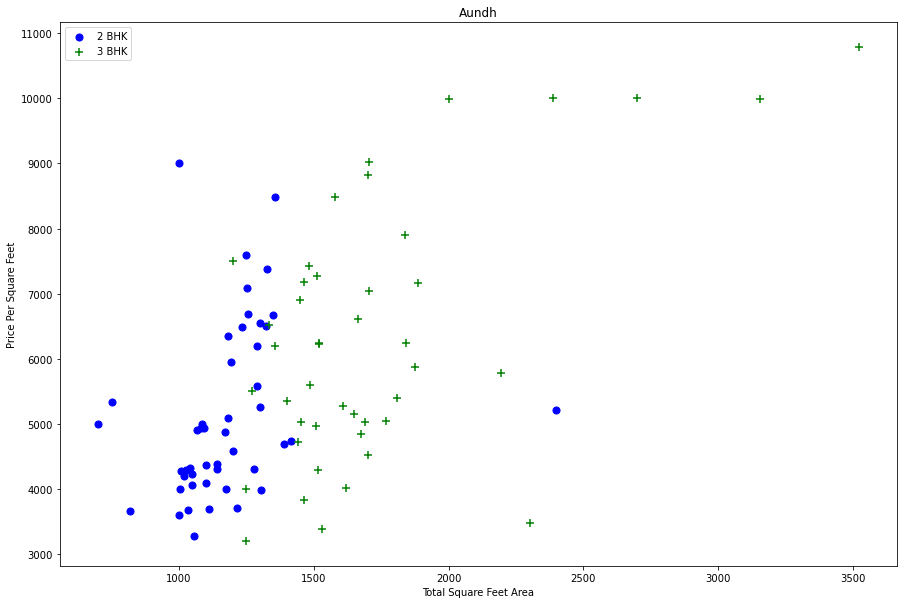

In [36]:
def plot_scatter_chart(df,site_location):
    bhk2 = df[(df.site_location==site_location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==site_location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter (bhk2.total_sqft,bhk2.price_per_sqft, color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel ("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df7,"Aundh")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, location_df in df.groupby ('site_location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7543, 7)

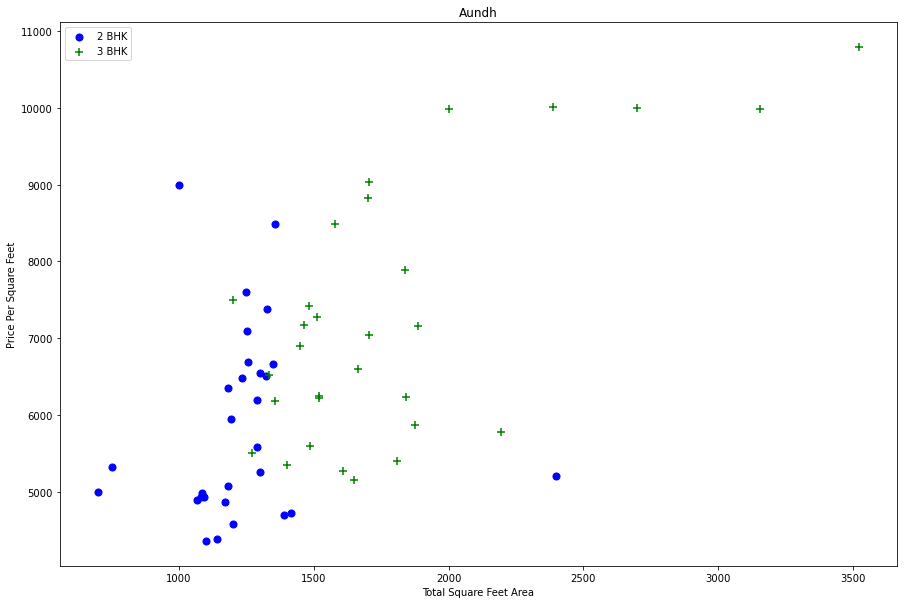

In [38]:
plot_scatter_chart(df8,"Aundh")

Text(0, 0.5, 'Count')

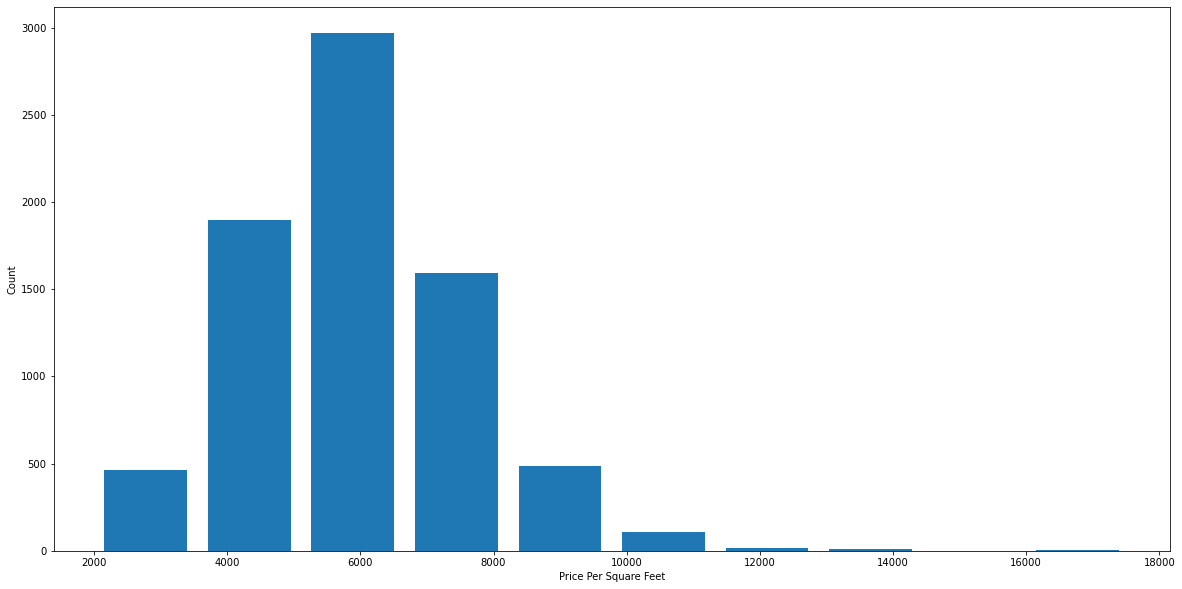

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [40]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [41]:
df8[df8.bath>10]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
1211,11 BHK,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2637,10 BHK,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000
5265,13 BHK,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6350,16 BHK,10000.0,16.0,550.0,Model colony,16,5500.000000
10389,10 BHK,4000.0,12.0,160.0,Wagholi,10,4000.000000


Text(0, 0.5, 'Count')

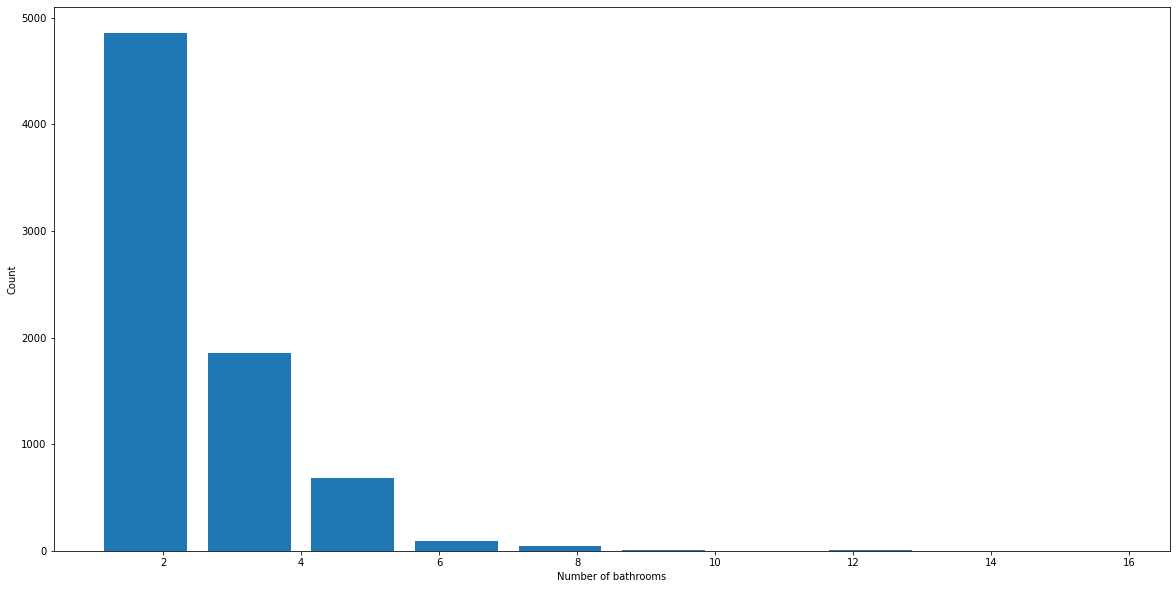

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [43]:
df8[df8.bath>df8.bhk+2]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
772,3 BHK,1806.0,6.0,116.0,Baner,3,6423.034330
3067,6 BHK,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,4 Bedroom,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [44]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 7)

In [45]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2


Machine Learning Model Creation

In [46]:
dummies = pd.get_dummies(df10.site_location)
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head(3)

,total_sqft,bath,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,Alandi Road,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df12 = df11.drop('site_location', axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df12.shape

(7479, 100)

In [50]:
x = df12.drop('price', axis='columns')
x.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df12.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [53]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8234037699553769

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87729294, 0.87158074, 0.80258826, 0.89763339, 0.81086632])

In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        }, 
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection':  ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.857080,{'normalize': True}
1,lasso,0.857851,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.779245,"{'criterion': 'mse', 'splitter': 'random'}"


In [56]:
def predict_price(site_location,sqft,bath,bhk):
    loc_index = np.where(x.columns==site_location)[0][0]
    
    z=np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1
    
    return lr_clf.predict([z])[0]

In [57]:
predict_price('Aundh', 1000, 2, 2)

65.05903244018555

In [58]:
predict_price('Viman Nagar', 1000, 2, 2)

63.130767822265625

In [59]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [60]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))